In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# url = "C:/Users/HP WORLD ANAND/.kaggle/Genre Classification Dataset.csv" 
# df = pd.read_csv(url)
# # print(df.head())
columns = [ 'Title' , 'Genre' , 'Description']
column = ['Title' , 'Description']
dataset=pd.read_csv('C:/Users/HP WORLD ANAND/.kaggle/Genre Classification Dataset/train_data.txt',delimiter=':::',header=None,index_col=0,names=columns)
print(dataset)

C:\Users\HP WORLD ANAND\AppData\Local\Temp\ipykernel_17484\252941674.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataset=pd.read_csv('C:/Users/HP WORLD ANAND/.kaggle/Genre Classification Dataset/train_data.txt',delimiter=':::',header=None,index_col=0,names=columns)


                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

## Data Preprocessing

In [5]:
dataset.loc[:,'Description'] = dataset['Description'].astype(str).str.lower()

In [6]:
dataset.drop('Title',axis=1,inplace=True)
print(dataset)

               Genre                                        Description
1             drama    listening in to a conversation between his do...
2          thriller    a brother and sister with a past incestuous r...
3             adult    as the bus empties the students for their fie...
4             drama    to help their unemployed father make ends mee...
5             drama    the film's title refers not only to the un-re...
...              ...                                                ...
54210        comedy    this short-lived nbc live sitcom centered on ...
54211        horror    the next generation of exploitation. the sist...
54212   documentary    ze bestaan echt, is a stand-up comedy about g...
54213        comedy    walter and vivian live in the country and hav...
54214       history    on labor day weekend, 1935, the most intense ...

[54214 rows x 2 columns]


In [6]:
dataset=dataset.drop_duplicates()
print(dataset)

                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

In [12]:
x=dataset['Description'].values
y=dataset['Genre'].values

## Vectorising dataset

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(x)
print(x_tfidf)

  (0, 13463)	0.11807922339778058
  (0, 80433)	0.16501137796382298
  (0, 104939)	0.13360937044563628
  (0, 20056)	0.09877908598132552
  (0, 9252)	0.1731338895127347
  (0, 33275)	0.18050036498413863
  (0, 24111)	0.17473735132605314
  (0, 83308)	0.11584070219189253
  (0, 40634)	0.07153260341614887
  (0, 76597)	0.022805396428549358
  (0, 22488)	0.09415888783657098
  (0, 40981)	0.09411408890991067
  (0, 63799)	0.06182522246551101
  (0, 62512)	0.04889827462946587
  (0, 4426)	0.12367843746496429
  (0, 19491)	0.13802601955926055
  (0, 118056)	0.14536283909874026
  (0, 51155)	0.12447718426687937
  (0, 118615)	0.16400954029503087
  (0, 84836)	0.10602667339840499
  (0, 36370)	0.1018013330598422
  (0, 37225)	0.16775987018111047
  (0, 48023)	0.09032201654492837
  (0, 113265)	0.10831533107977231
  (0, 6471)	0.1319647486047778
  :	:
  (54213, 35902)	0.11076825965292014
  (54213, 35942)	0.11259281203472084
  (54213, 102220)	0.15125415917102358
  (54213, 54036)	0.093736132668739
  (54213, 48808)	0.1376

## Split Dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split
# labels = [1, 0, 1] 
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=0) 

## Training model using logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\HP WORLD ANAND\Anaconda for python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Predict data

In [13]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[' drama ' ' western ']
 [' comedy ' ' adult ']
 [' documentary ' ' documentary ']
 ...
 [' comedy ' ' drama ']
 [' documentary ' ' documentary ']
 [' action ' ' comedy ']]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(classification_report(y_pred, y_test,zero_division=0))
accuracy_score(y_test, y_pred)

               precision    recall  f1-score   support

      action        0.19      0.49      0.27        97
       adult        0.18      0.75      0.29        28
   adventure        0.08      0.73      0.15        15
   animation        0.02      1.00      0.04         2
   biography        0.00      0.00      0.00         0
      comedy        0.61      0.55      0.58      1605
       crime        0.01      0.33      0.02         3
 documentary        0.88      0.65      0.75      3511
       drama        0.81      0.54      0.65      4219
      family        0.06      0.69      0.11        13
     fantasy        0.00      0.00      0.00         1
   game-show        0.54      0.79      0.64        19
     history        0.00      0.00      0.00         0
      horror        0.57      0.76      0.65       320
       music        0.42      0.64      0.51        91
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

0.5888550041585805

## Visualization

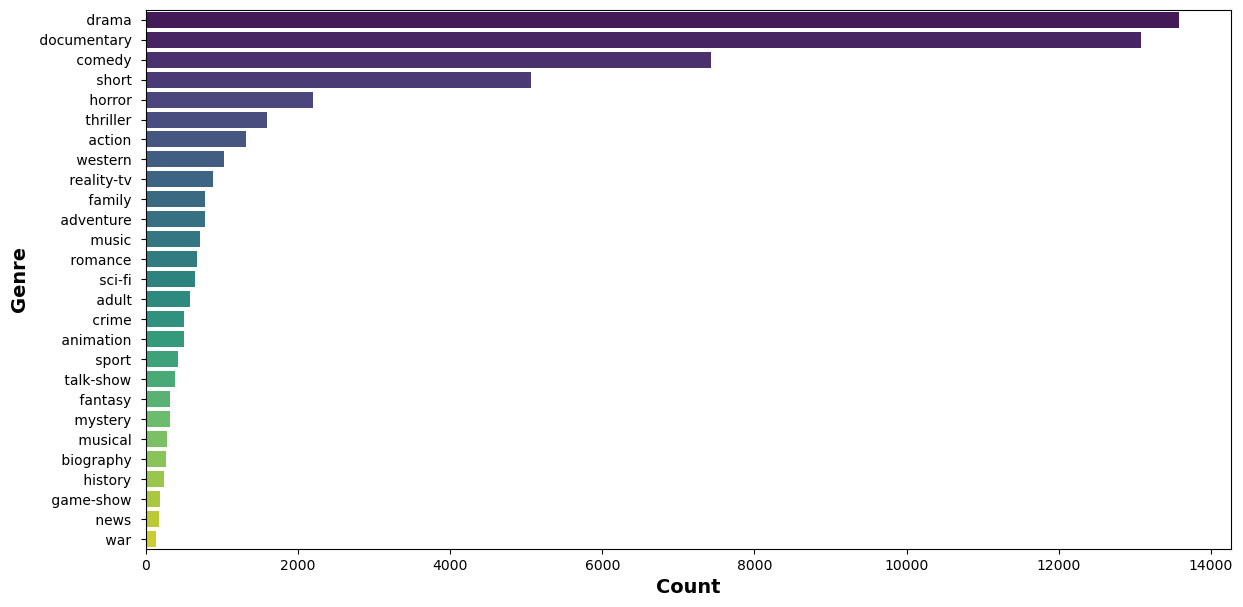

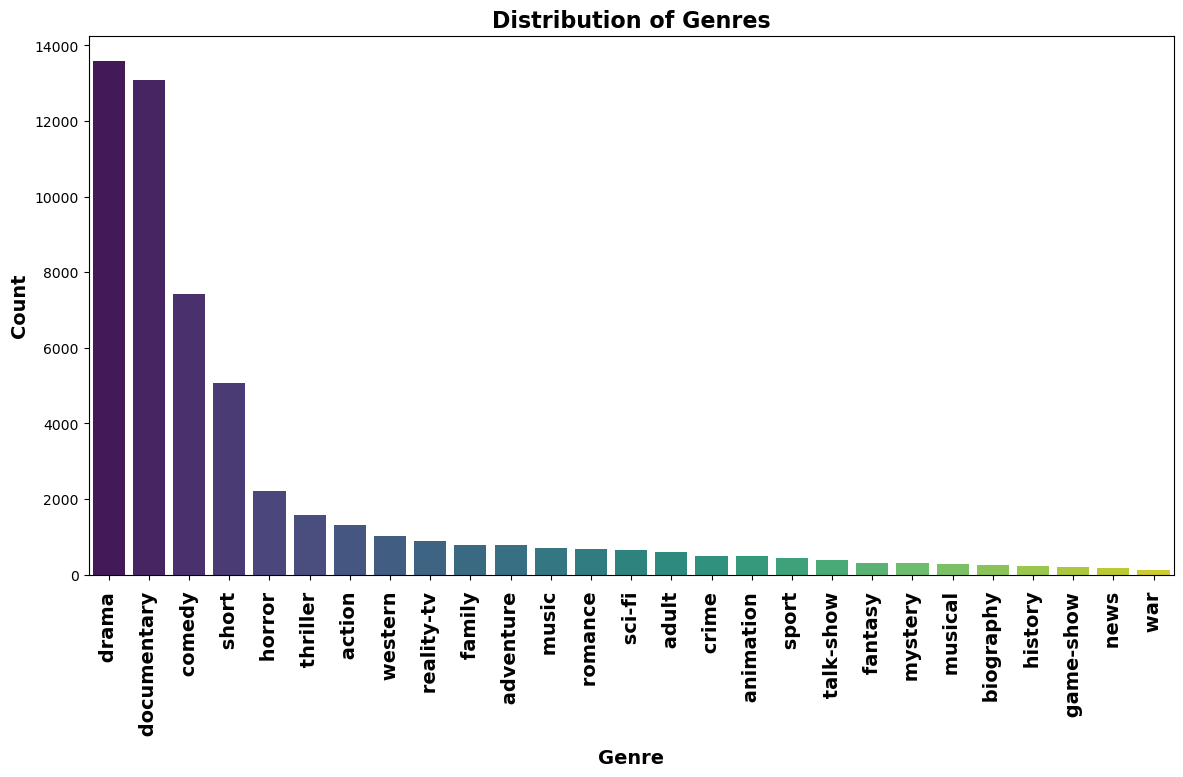

In [16]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=dataset, y='Genre', order=dataset['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = dataset['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

## Split Data and train model (Naive Bayes)

In [17]:
# Split the data into training and validation sets
X = x_tfidf
y = dataset['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4497735883929396


C:\Users\HP WORLD ANAND\Anaconda for python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP WORLD ANAND\Anaconda for python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       271
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.49      0.03      0.05      1445
       crime        0.00      0.00      0.00        88
 documentary        0.55      0.90      0.69      2685
       drama        0.38      0.89      0.53      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        52
      horror        0.00      0.00      0.00       429
       music        0.00      0.00      0.00       148
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        89
        n

C:\Users\HP WORLD ANAND\Anaconda for python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train Model SVM

In [ ]:
# from sklearn.svm import SVC
# model = SVC(kernel='linear',C=1.0)
# model.fit(x_train, y_train)
# model.score(x_train, y_train)

In [ ]:
# accuracy = accuracy_score(Y_test, y_pred)
# print("Validation Accuracy:", accuracy)

## Data preprocessing

In [20]:
# Initialize the stemmer and stop words
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
# Function to clean description
def clean_description(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply cleaning function to Description column
dataset['Clean_Description'] = dataset['Description'].apply(clean_description)


In [21]:
# Splitting the data into train and validation sets
X = dataset['Clean_Description'].iloc[:20000]
y = dataset['Genre'].iloc[:20000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

In [23]:
# Convert text to numerical features using TF-IDF
vectorize = TfidfVectorizer()
X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf  = vectorize.transform(X_test)

In [24]:
# Training the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [25]:
# Making predictions on the training set
y_pred_val = svm_classifier.predict(X_test_tfidf)
valAccuracy = accuracy_score(y_test, y_pred_val)
print("Validation Accuracy:", valAccuracy)

Validation Accuracy: 0.5115
